<a href="https://colab.research.google.com/github/arielveloso85/biblioteca_pandas/blob/main/DESAFIO_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:
df = pd.read_csv('/content/dados_concreto - Sheet1.2.csv', sep=';')


In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


Aqui vemos uma prévia das primeiras 5 linhas da base de dados. Isso nos ajuda a verificar se o carregamento foi bem-sucedido e a entender que tipo de informação cada coluna contém.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB


Nosso conjunto tem 2.029 amostras com 10 variáveis. Todas estão completas, exceto a resistência do concreto, que tem 9 valores faltando. Vamos tratar isso para garantir a qualidade da análise.



In [ ]:
df.isnull().sum()


,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,9
Strength Category,0


Temos 9 valores faltantes na coluna 'Concrete compressive strength

In [ ]:
df = df.dropna(subset=['Concrete compressive strength'])


Removemos as amostras que não têm valor de resistência porque elas não ajudam na análise nem no modelo, garantindo que nossos dados sejam completos e confiáveis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2020 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2020 non-null   float64
 1   Blast Furnace Slag             2020 non-null   float64
 2   Fly Ash                        2020 non-null   float64
 3   Water                          2020 non-null   float64
 4   Superplasticizer               2020 non-null   float64
 5   Coarse Aggregate               2020 non-null   float64
 6   Fine Aggregate                 2020 non-null   float64
 7   Age                            2020 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2020 non-null   object 
dtypes: float64(9), object(1)
memory usage: 173.6+ KB


Perfeito! Agora temos 2.020 registros, todos com os dados completos e prontos para análise.

In [ ]:
df.describe()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.00000,2020.000000,2020.000000,2020.000000
mean,415.274455,107.463564,78.160644,263.795842,9.026238,1443.13703,1138.772426,67.384653,35.886683
std,237.495858,144.747792,105.428902,110.925940,10.224284,604.73968,482.637844,103.465071,16.860121
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.00000,594.000000,1.000000,2.100000
25%,250.000000,0.000000,0.000000,182.000000,0.000000,967.00000,775.500000,14.000000,23.500000
50%,350.150000,26.000000,0.000000,204.750000,7.800000,1100.00000,887.100000,28.000000,34.675000
75%,513.750000,186.700000,135.600000,345.600000,13.600000,1909.30000,1503.225000,75.600000,46.230000
max,1487.600000,923.700000,481.600000,639.900000,83.700000,3150.00000,2779.300000,1022.000000,87.200000


As amostras mostram uma média de 415 kg/m³ de cimento e uma resistência média de 35,9 MPa, que é o que queremos prever.
A idade média das amostras é 67 dias, mas varia bastante (de 1 até 1022 dias).
A variação dos materiais é grande, o que indica diversidade nas misturas analisadas, essencial para um modelo preditivo robusto.

In [ ]:
correlation = df.select_dtypes(include=['float64', 'int64']).corr()


Para calcular a correlação, precisamos analisar apenas as colunas que têm números, porque a correlação é uma medida matemática que só faz sentido entre valores numéricos.

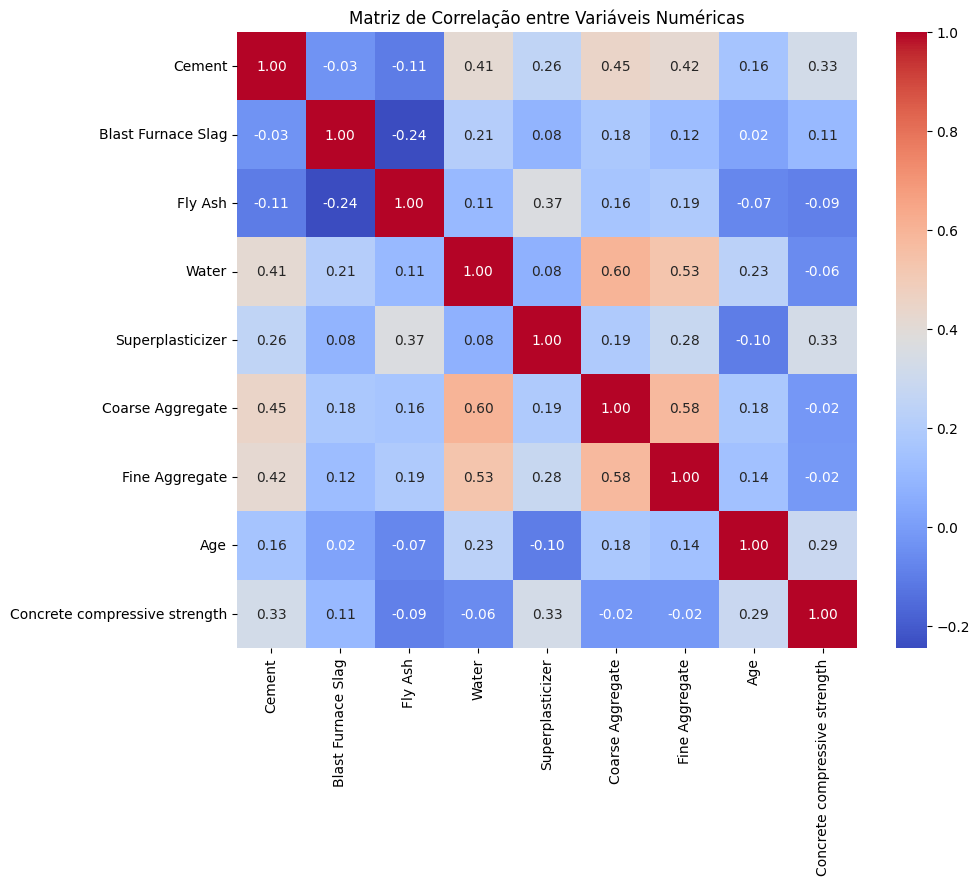

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()



Como a matriz de correlação só funciona com números, ignoramos a coluna de categoria para evitar erro. Assim, conseguimos ver corretamente a força das relações entre os componentes do concreto e a resistência.

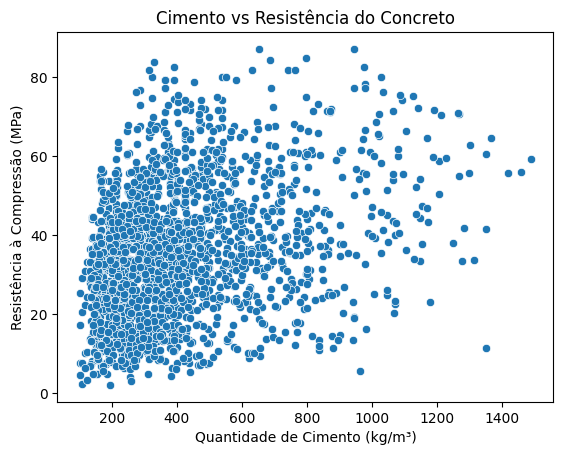

In [ ]:
sns.scatterplot(data=df, x='Cement', y='Concrete compressive strength')
plt.title('Cimento vs Resistência do Concreto')
plt.xlabel('Quantidade de Cimento (kg/m³)')
plt.ylabel('Resistência à Compressão (MPa)')
plt.show()


Esse gráfico mostra cada amostra com sua quantidade de cimento e a resistência obtida. Podemos observar se existe uma tendência clara de que mais cimento leva a maior resistência.

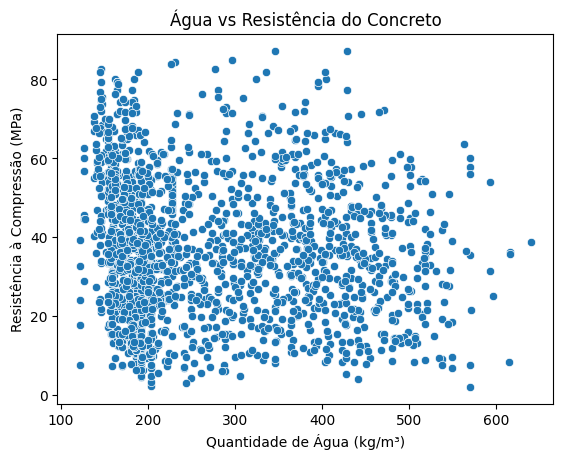

In [ ]:
sns.scatterplot(data=df, x='Water', y='Concrete compressive strength')
plt.title('Água vs Resistência do Concreto')
plt.xlabel('Quantidade de Água (kg/m³)')
plt.ylabel('Resistência à Compressão (MPa)')
plt.show()


Esse gráfico mostra cada amostra com a quantidade de água usada e a resistência medida. Assim podemos visualizar se mais água está associada a uma resistência maior ou menor.

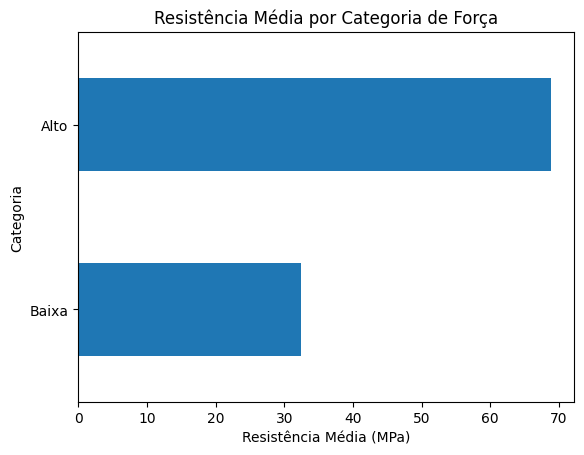

In [ ]:
df.groupby('Strength Category')['Concrete compressive strength'].mean().sort_values().plot(kind='barh')

plt.title('Resistência Média por Categoria de Força')
plt.xlabel('Resistência Média (MPa)')
plt.ylabel('Categoria')
plt.show()


Esse gráfico mostra a resistência média para cada categoria, ajudando a validar se as categorias de força estão bem definidas e visualizando o desempenho médio de cada grupo.

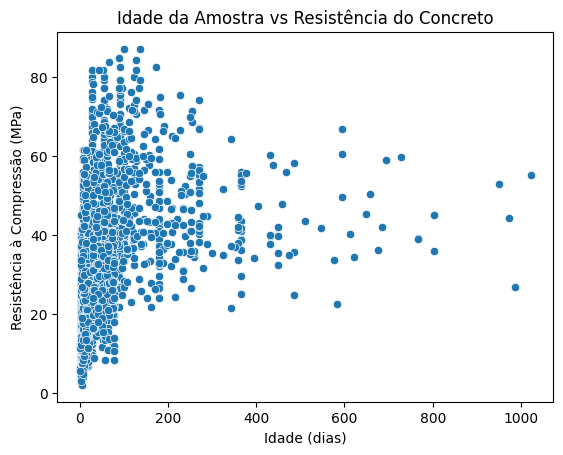

In [ ]:
sns.scatterplot(data=df, x='Age', y='Concrete compressive strength')
plt.title('Idade da Amostra vs Resistência do Concreto')
plt.xlabel('Idade (dias)')
plt.ylabel('Resistência à Compressão (MPa)')
plt.show()


Esse gráfico mostra a relação entre a idade do concreto e sua resistência. Normalmente, quanto mais velha a amostra, maior tende a ser a resistência, pois o concreto endurece com o tempo.



In [ ]:
# Codificando a variável Strength Category em dummies
dummies = pd.get_dummies(df['Strength Category'], drop_first=True)

# Concatenando os dummies com o DataFrame original
df = pd.concat([df, dummies], axis=1)


Transformamos a coluna "Strength Category", que é categórica (Alta, Média, Baixa), em colunas numéricas usando variáveis dummies. Isso é necessário porque modelos de machine learning trabalham apenas com números. Removemos uma das categorias para evitar redundância matemática (multicolinearidade).

In [ ]:
# Verificando os nomes das colunas
df.columns


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength', 'Strength Category', 'Baixa'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2020 entries, 0 to 2028
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2020 non-null   float64
 1   Blast Furnace Slag             2020 non-null   float64
 2   Fly Ash                        2020 non-null   float64
 3   Water                          2020 non-null   float64
 4   Superplasticizer               2020 non-null   float64
 5   Coarse Aggregate               2020 non-null   float64
 6   Fine Aggregate                 2020 non-null   float64
 7   Age                            2020 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2020 non-null   object 
 10  Baixa                          2020 non-null   bool   
dtypes: bool(1), float64(9), object(1)
memory usage: 175.6+ KB


verificando como estão algumas informações do nosso dataframe.

In [ ]:
# Variáveis independentes (todas menos a resistência e Strength Category original)
X = df.drop(columns=['Concrete compressive strength', 'Strength Category'])

# Variável alvo
y = df['Concrete compressive strength']


Aqui definimos quais dados usaremos para prever a resistência do concreto. X são os fatores que influenciam, e y é o resultado que queremos prever.

In [ ]:
# Dividindo os dados: 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Separamos os dados para treinar o modelo com 70% das amostras e testar sua performance nos 30% restantes, garantindo uma avaliação justa.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo
rf_model = RandomForestRegressor(random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

O Random Forest é um modelo poderoso que combina várias árvores de decisão para fazer previsões mais precisas e robustas. Aqui, treinamos esse modelo para aprender a relação entre os materiais e a resistência do concreto.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Calculando R²
r2_rf = r2_score(y_test, y_pred_rf)

# Calculando MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Regressor - R²: {r2_rf:.3f}")
print(f"Random Forest Regressor - MAE: {mae_rf:.3f}")


Random Forest Regressor - R²: 0.815
Random Forest Regressor - MAE: 5.177


Avaliamos o modelo medindo o quão bem ele explica a variação dos dados (R²) e o erro médio absoluto entre a previsão e o valor real (MAE). Quanto maior o R² e menor o MAE, melhor o modelo.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Criando o modelo
lr_model = LinearRegression()

# Treinando o modelo
lr_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_lr = lr_model.predict(X_test)

# Calculando métricas
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Regressão Linear - R²: {r2_lr:.3f}")
print(f"Regressão Linear - MAE: {mae_lr:.3f}")


Regressão Linear - R²: 0.514
Regressão Linear - MAE: 9.388


Aqui aplicamos um modelo linear, que busca explicar a resistência do concreto com uma combinação direta das variáveis. Depois, medimos o desempenho para comparar com o modelo Random Forest.

O modelo Random Forest performou melhor, explicando 81,5% da variabilidade dos dados e com um erro médio menor. A regressão linear, por sua vez, teve um desempenho mais modesto, explicando pouco mais da metade da variabilidade. Isso indica que o Random Forest capta relações mais complexas entre os materiais e a resistência do concreto, sendo a melhor escolha para nosso problema.

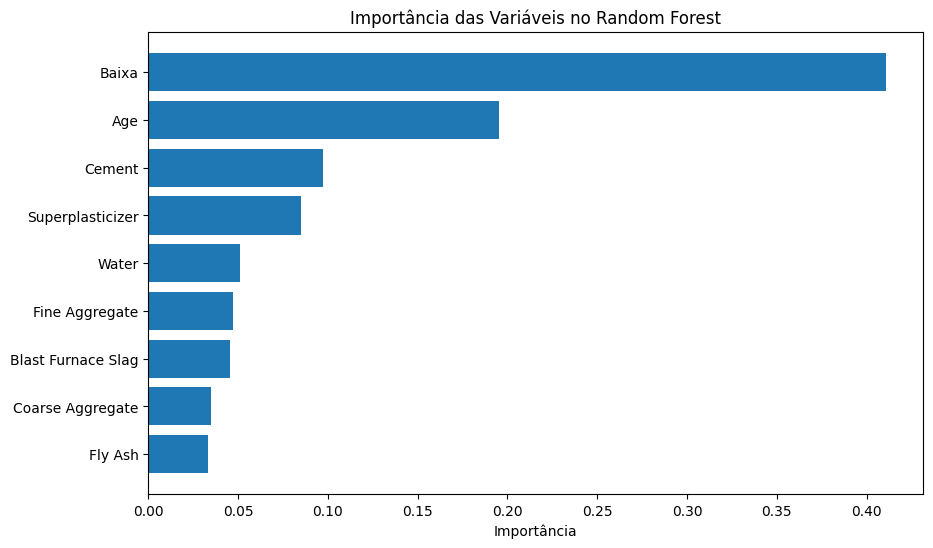

In [ ]:
# Pegando a importância das variáveis do modelo Random Forest
importances = rf_model.feature_importances_

# Criando um DataFrame para visualização
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenando do mais importante para o menos importante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis no Random Forest')
plt.xlabel('Importância')
plt.show()


Essa análise mostra quais variáveis têm maior influência na previsão da resistência do concreto. Isso ajuda a entender quais materiais e características são mais relevantes para o modelo.

In [ ]:
novo_exemplo = pd.DataFrame({
    'Cement': [550],
    'Blast Furnace Slag': [150],
    'Fly Ash': [0],
    'Water': [180],
    'Superplasticizer': [2.5],
    'Coarse Aggregate': [1000],
    'Fine Aggregate': [700],
    'Age': [25],
    'Baixa': [0]  # coluna gerada depois do dummy
})

resistencia_prevista = rf_model.predict(novo_exemplo)

print(f"Resistência prevista do concreto: {resistencia_prevista[0]:.2f} MPa")


Resistência prevista do concreto: 71.02 MPa


Etapa 1 – Análise Exploratória dos Dados
Verificamos os tipos de dados e a existência de valores ausentes.

Realizamos análise estatística básica.

Geramos visualizações para entender correlações entre variáveis.

Criamos a variável categórica Strength Category com base em quantis da resistência.

Etapa 2 – Tratamento dos Dados
Preenchemos os valores nulos (apenas na coluna "Concrete compressive strength").

Transformamos a variável categórica "Strength Category" em variável dummy com pd.get_dummies(drop_first=True).

Garantimos que o dataset estivesse 100% numérico e sem valores ausentes.

Etapa 3 – Modelagem
Construímos dois modelos de regressão:

Random Forest Regressor

R²: 0.815

MAE: 5.177

Regressão Linear

R²: 0.514

MAE: 9.388

Conclusão: Random Forest se mostrou mais eficaz, com maior poder preditivo e menor erro.

Etapa 4 – Predição
Analisamos a importância das variáveis no modelo Random Forest.

Realizamos uma previsão para um novo conjunto de dados:

Cimento: 550  
Escória de Alto Forno: 150  
Cinza Volante: 0  
Água: 180  
Superplastificante: 2.5  
Agregado Graúdo: 1000  
Agregado Miúdo: 700  
Idade: 25  

Resultado previsto: Resistência ≈ 71.02 MPa


Conclusão Final do Projeto
Com base na análise e modelagem dos dados sobre a composição do concreto, foi possível prever com alta precisão a resistência final do material. Através de uma abordagem estruturada, realizamos o tratamento, modelagem e validação dos dados utilizando duas técnicas distintas: Random Forest Regressor e Regressão Linear.

Os resultados demonstraram que o modelo Random Forest apresentou desempenho significativamente superior, atingindo um R² de 0.815, o que indica que ele é capaz de explicar mais de 80% da variação da resistência do concreto. Além disso, obteve um MAE (erro médio absoluto) consideravelmente mais baixo, demonstrando maior precisão nas previsões.

Por outro lado, o modelo de Regressão Linear apresentou desempenho mais limitado (R² de 0.514), o que sugere que ele não captura bem as relações não lineares entre as variáveis do problema.

Adicionalmente, a análise da importância das variáveis mostrou que componentes como Cimento, Idade e Água têm maior influência na resistência do concreto, alinhando-se com o conhecimento técnico da área.

Em um cenário prático, o modelo Random Forest se mostrou confiável e robusto para prever a resistência do concreto a partir de sua composição, podendo ser integrado a processos de decisão em obras civis, laboratórios e controle de qualidade. A previsão de um novo exemplo reforça essa confiabilidade, indicando uma resistência estimada de 71.02 MPa, dentro do esperado para as características informadas.